In [16]:
# Import different type of liblaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:


# Load and display the full data from the CSV file
data = pd.read_csv('spotify-2023.csv', encoding='latin1')
data



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Overview of Dataset

In [18]:


# Loop through each column to find any missing values
for column in data.columns:
    if data[column].isnull().any():  # If the column has missing values
        missing_data = data[data[column].isnull()]  # Get rows with missing values in the column
        print(f"Missing values in '{column}':")  # Display the column name with missing values
        print(missing_data[['track_name', column]])  # Print track names with missing data in the column
        print()  # Blank line for clarity between results


Missing values in 'in_shazam_charts':
                                 track_name in_shazam_charts
14                                As It Was              NaN
54                             Another Love              NaN
55                          Blinding Lights              NaN
71                               Heat Waves              NaN
73                          Sweater Weather              NaN
86                        Someone You Loved              NaN
127                        Watermelon Sugar              NaN
158                                   Ghost              NaN
159                     Under The Influence              NaN
180                           Night Changes              NaN
243                             Unstoppable              NaN
274                                 Shivers              NaN
320                      Gangsta's Paradise              NaN
392                               Calm Down              NaN
395                              Space Song    

## Basic Descriptive Statistics

In [20]:
# Convert the 'streams' column to numeric, coercing errors to NaN
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Calculate mean, median, and standard deviation of the 'streams' column
mean_streams = data['streams'].mean()  # Mean of streams
median_streams = data['streams'].median()  # Median of streams
std_streams = data['streams'].std()  # Standard deviation of streams

# Create a DataFrame to hold the statistical results
results = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation'],  # Statistic labels
    'Value': [mean_streams, median_streams, std_streams]  # Corresponding values
})

# Print the results table with formatted statistics
print("Results:")  # Title for the results
print(f"Mean: {mean_streams:.2f}")  # Display mean
print(f"Median: {median_streams:.2f}")  # Display median
print(f"Standard Deviation: {std_streams:.2f}")  # Display standard deviation

Results:
Mean: 514137424.94
Median: 290530915.00
Standard Deviation: 566856949.04


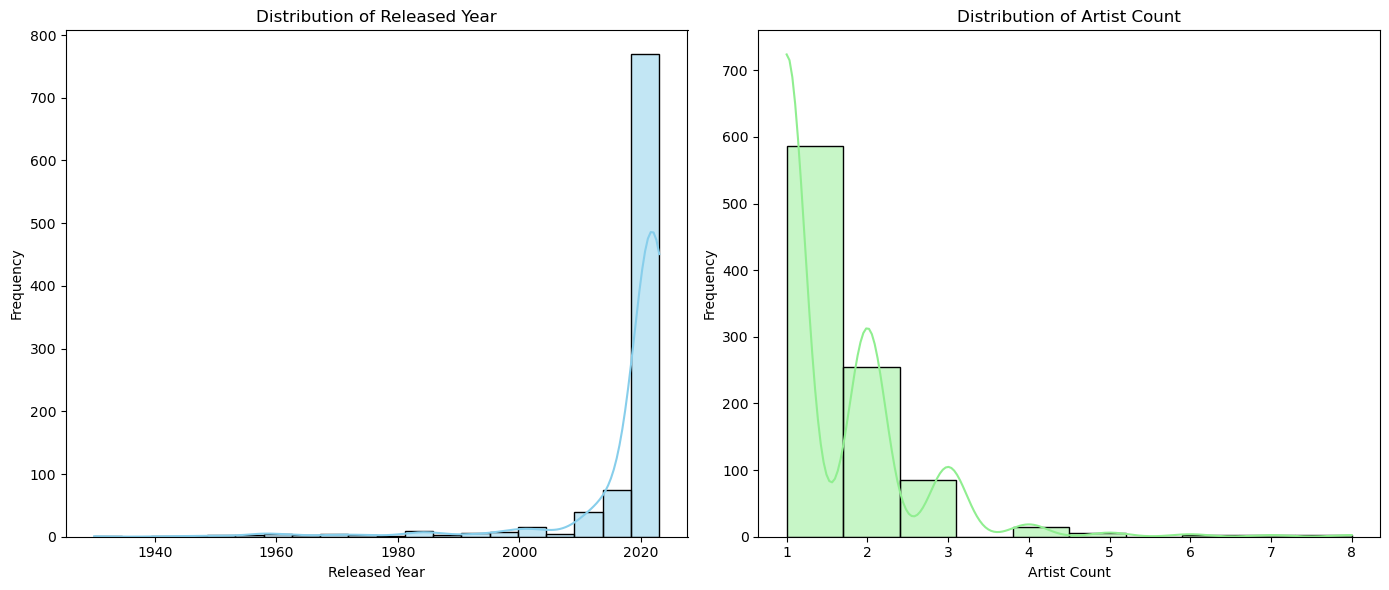

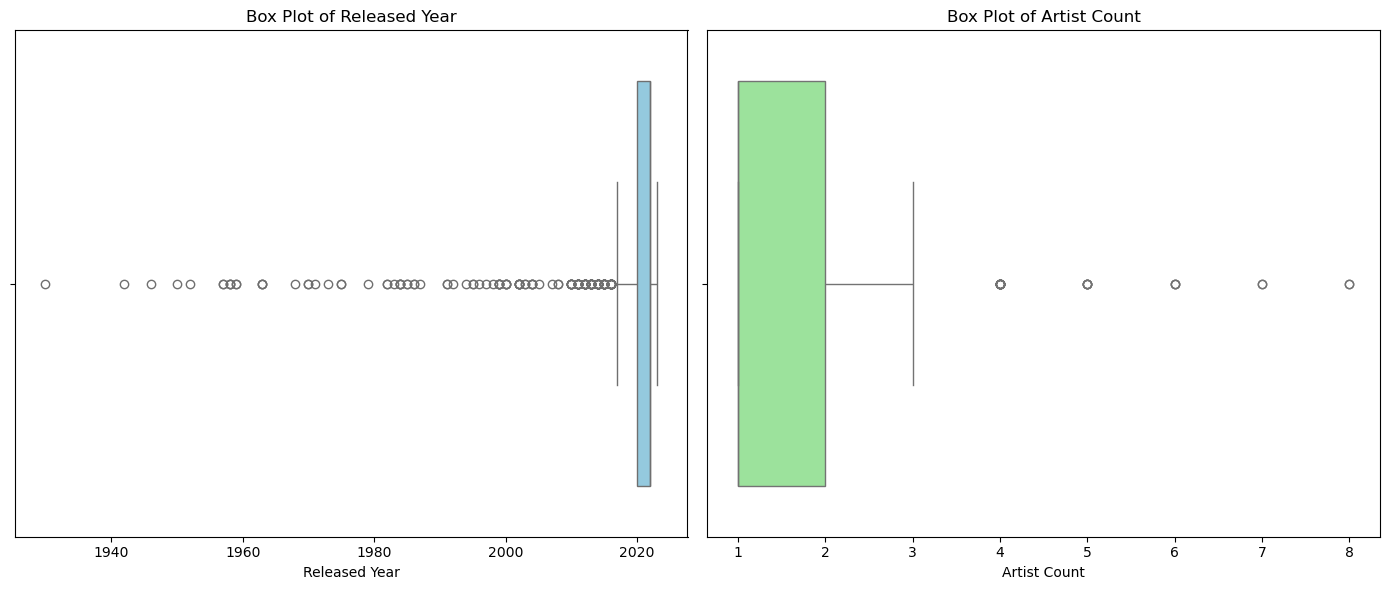

In [21]:
# Create histograms for 'released_year' and 'artist_count'
plt.figure(figsize=(14, 6))  # Set figure size for the histograms

# Histogram for 'released_year'
plt.subplot(1, 2, 1)  # Create a subplot for the first histogram
sns.histplot(data['released_year'], bins=20, kde=True, color='skyblue')  # Plot histogram with kernel density estimate (KDE)
plt.title('Distribution of Released Year')  # Title for the histogram
plt.xlabel('Released Year')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label

# Histogram for 'artist_count'
plt.subplot(1, 2, 2)  # Create a subplot for the second histogram
sns.histplot(data['artist_count'], bins=10, kde=True, color='lightgreen')  # Plot histogram with KDE
plt.title('Distribution of Artist Count')  # Title for the histogram
plt.xlabel('Artist Count')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the histograms

# Create box plots for 'released_year' and 'artist_count'
plt.figure(figsize=(14, 6))  # Set figure size for the box plots

# Box plot for 'released_year'
plt.subplot(1, 2, 1)  # Create a subplot for the first box plot
sns.boxplot(x=data['released_year'], color='skyblue')  # Plot box plot for released year
plt.title('Box Plot of Released Year')  # Title for the box plot
plt.xlabel('Released Year')  # X-axis label

# Box plot for 'artist_count'
plt.subplot(1, 2, 2)  # Create a subplot for the second box plot
sns.boxplot(x=data['artist_count'], color='lightgreen')  # Plot box plot for artist count
plt.title('Box Plot of Artist Count')  # Title for the box plot
plt.xlabel('Artist Count')  # X-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the box plots


## Top Performers

In [122]:
# Find the top 5 most streamed tracks
top_streamed_tracks = data[['track_name', 'artist(s)_name', 'streams']].nlargest(5, 'streams')

# Display the results
print("Top 5 Most Streamed Tracks:")
print(top_streamed_tracks)

Top 5 Most Streamed Tracks:
                                        track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

          streams  
55  3703895074.00  
179 3562543890.00  
86  2887241814.00  
620 2864791672.00  
41  2808096550.00  


In [140]:

# Load the dataset
data = pd.read_csv('spotify-2023.csv', encoding='latin1')

# Count occurrences of each artist, including collaborations
top_artists = data['artist(s)_name'].str.split(',').explode().str.strip().value_counts().head(5)

# Display the results
print("Top 5 Most Frequent Artists (including collaborations):")
print(top_artists)


Top 5 Most Frequent Artists (including collaborations):
artist(s)_name
Bad Bunny         40
Taylor Swift      38
The Weeknd        37
SZA               23
Kendrick Lamar    23
Name: count, dtype: int64


## Temporal Trends

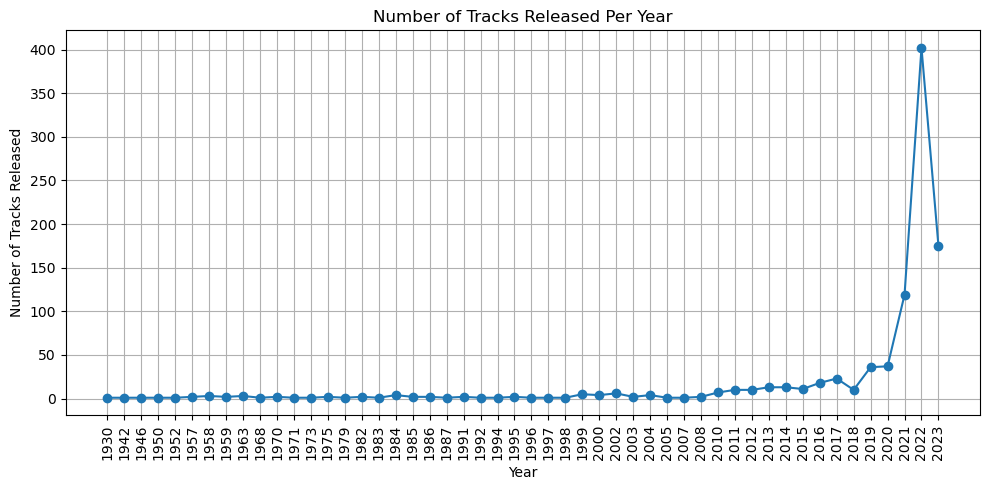

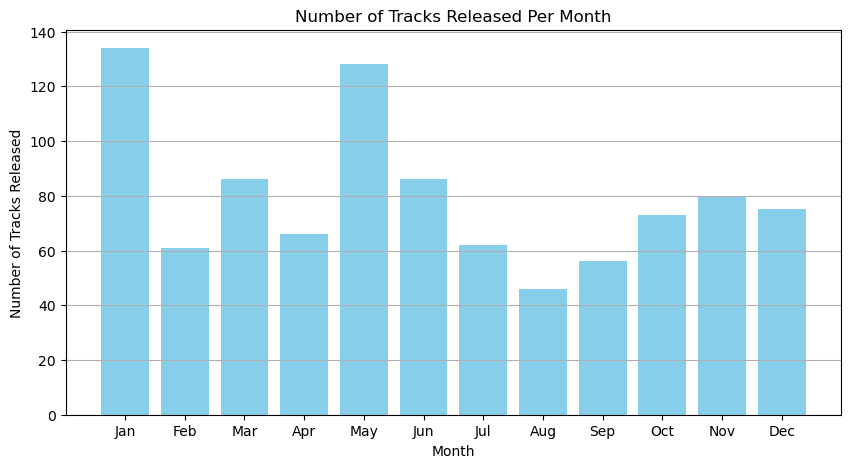

The month with the most releases is 1 with 134 tracks.


In [27]:
# Extract the year and month from the 'released_year' column
data['released_year'] = data['released_year'].astype(str)  # Convert 'released_year' to string type
data['year'] = data['released_year'].str[:4]  # Extract the first four characters as the year
data['month'] = data['released_month']  # Assign 'released_month' column to new 'month' column

# Count the number of tracks released per year
tracks_per_year = data['year'].value_counts().sort_index()  # Count and sort track releases by year

# Plot the number of tracks released per year
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(tracks_per_year.index, tracks_per_year.values, marker='o', linestyle='-')  # Line plot
plt.title('Number of Tracks Released Per Year')  # Title of the plot
plt.xlabel('Year')  # X-axis label
plt.ylabel('Number of Tracks Released')  # Y-axis label
plt.grid()  # Add grid for better readability

# Adjust x-axis ticks for better visibility
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Prevent clipping of tick labels
plt.show()  # Display the plot

# Count the number of tracks released per month
tracks_per_month = data['month'].value_counts().sort_index()  # Count and sort track releases by month

# Plot the number of tracks released per month
plt.figure(figsize=(10, 5))  # Set figure size
plt.bar(tracks_per_month.index, tracks_per_month.values, color='skyblue')  # Bar plot
plt.title('Number of Tracks Released Per Month')  # Title of the plot
plt.xlabel('Month')  # X-axis label
plt.ylabel('Number of Tracks Released')  # Y-axis label
plt.xticks(tracks_per_month.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set month labels
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.show()  # Display the plot

# Identify the month with the most releases
most_releases_month = tracks_per_month.idxmax()  # Get the month with the highest track count
most_releases_count = tracks_per_month.max()  # Get the count of tracks for that month

# Print the result
print(f"The month with the most releases is {most_releases_month} with {most_releases_count} tracks.")  # Display the month and count


## Genre and Music Characteristics

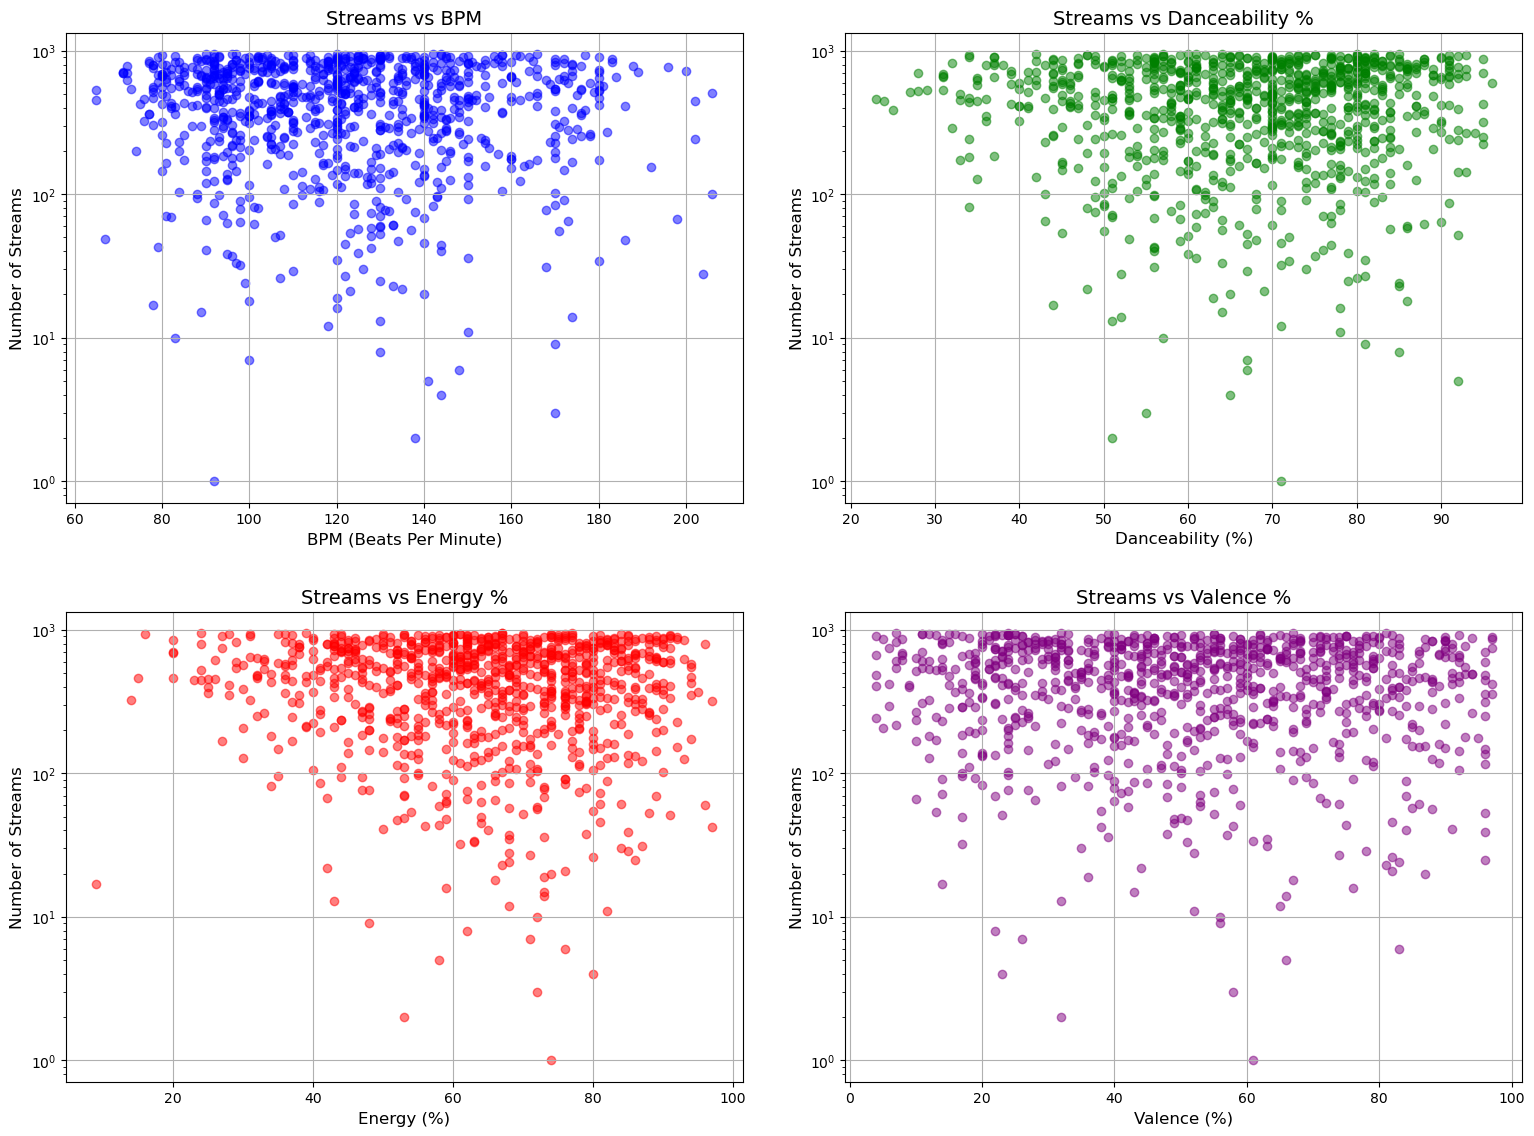

Correlation between Danceability % and Energy %: 0.20
Correlation between Valence % and Acousticness %: -0.08


In [41]:
# Load the dataset
data = pd.read_csv('spotify-2023.csv', encoding='latin1')  # Read the CSV file with specified encoding

# Select only the necessary columns
data_subset = data[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']]  # Create a subset of the DataFrame with relevant columns

# Drop rows with missing values
data_subset = data_subset.dropna()  # Remove any rows that contain missing values

# Create scatter plots with readability adjustments
plt.figure(figsize=(16, 12))  # Set the figure size for the plots

# Scatter plot for Streams vs. BPM
plt.subplot(2, 2, 1)  # Create a subplot in a 2x2 grid, first plot
plt.scatter(data_subset['bpm'], data_subset['streams'], color='blue', alpha=0.5)  # Scatter plot of BPM vs. streams
plt.title('Streams vs BPM', fontsize=14)  # Title of the plot
plt.xlabel('BPM (Beats Per Minute)', fontsize=12)  # X-axis label
plt.ylabel('Number of Streams', fontsize=12)  # Y-axis label
plt.yscale('log')  # Set Y-axis to log scale for better visibility of data distribution
plt.xticks(fontsize=10)  # Set font size for X-axis ticks
plt.yticks(fontsize=10)  # Set font size for Y-axis ticks
plt.grid(True)  # Enable grid for better readability

# Scatter plot for Streams vs Danceability
plt.subplot(2, 2, 2)  # Second plot in the grid
plt.scatter(data_subset['danceability_%'], data_subset['streams'], color='green', alpha=0.5)  # Scatter plot of danceability vs. streams
plt.title('Streams vs Danceability %', fontsize=14)  # Title of the plot
plt.xlabel('Danceability (%)', fontsize=12)  # X-axis label
plt.ylabel('Number of Streams', fontsize=12)  # Y-axis label
plt.yscale('log')  # Set Y-axis to log scale
plt.xticks(fontsize=10)  # Set font size for X-axis ticks
plt.yticks(fontsize=10)  # Set font size for Y-axis ticks
plt.grid(True)  # Enable grid

# Scatter plot for Streams vs Energy
plt.subplot(2, 2, 3)  # Third plot in the grid
plt.scatter(data_subset['energy_%'], data_subset['streams'], color='red', alpha=0.5)  # Scatter plot of energy vs. streams
plt.title('Streams vs Energy %', fontsize=14)  # Title of the plot
plt.xlabel('Energy (%)', fontsize=12)  # X-axis label
plt.ylabel('Number of Streams', fontsize=12)  # Y-axis label
plt.yscale('log')  # Set Y-axis to log scale
plt.xticks(fontsize=10)  # Set font size for X-axis ticks
plt.yticks(fontsize=10)  # Set font size for Y-axis ticks
plt.grid(True)  # Enable grid

# Scatter plot for Streams vs Valence
plt.subplot(2, 2, 4)  # Fourth plot in the grid
plt.scatter(data_subset['valence_%'], data_subset['streams'], color='purple', alpha=0.5)  # Scatter plot of valence vs. streams
plt.title('Streams vs Valence %', fontsize=14)  # Title of the plot
plt.xlabel('Valence (%)', fontsize=12)  # X-axis label
plt.ylabel('Number of Streams', fontsize=12)  # Y-axis label
plt.yscale('log')  # Set Y-axis to log scale
plt.xticks(fontsize=10)  # Set font size for X-axis ticks
plt.yticks(fontsize=10)  # Set font size for Y-axis ticks
plt.grid(True)  # Enable grid

# Adjust layout with added spacing
plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
plt.show()  # Display the plots

# Calculate and print correlation coefficients
dance_energy_corr = data_subset['danceability_%'].corr(data_subset['energy_%'])  # Calculate correlation between danceability and energy
valence_acoustic_corr = data_subset['valence_%'].corr(data_subset['acousticness_%'])  # Calculate correlation between valence and acousticness

# Print the correlation results
print(f'Correlation between Danceability % and Energy %: {dance_energy_corr:.2f}')
print(f'Correlation between Valence % and Acousticness %: {valence_acoustic_corr:.2f}')


In [29]:


# Calculate correlation matrices for the pairs
danceability_energy_corr = data[['danceability_%', 'energy_%']].corr()
valence_acousticness_corr = data[['valence_%', 'acousticness_%']].corr()

# Display the correlation matrices
print("The correlation between danceability_% and energy_% is")
print(danceability_energy_corr)

print("\nThe correlation between valence_% and acousticness_% is")
print(valence_acousticness_corr)


The correlation between danceability_% and energy_% is
                danceability_%  energy_%
danceability_%        1.000000  0.198095
energy_%              0.198095  1.000000

The correlation between valence_% and acousticness_% is
                valence_%  acousticness_%
valence_%        1.000000       -0.081907
acousticness_%  -0.081907        1.000000


## Platform Popularity

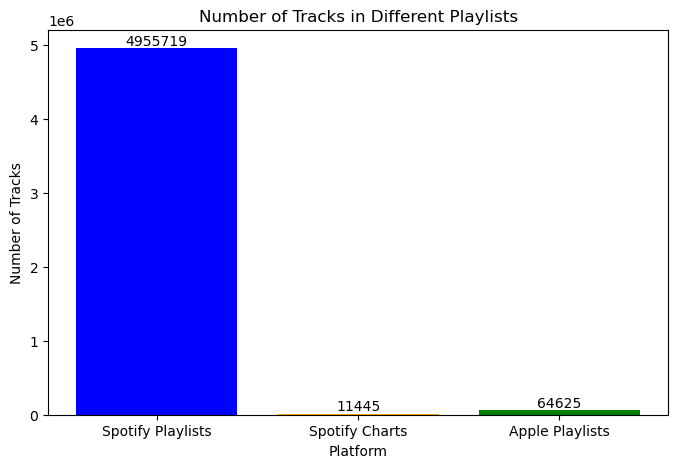

The platform that favors the most popular tracks is Spotify Playlists with 4955719 tracks.


In [31]:
# Count the number of tracks in each playlist category
spotify_playlists_count = data['in_spotify_playlists'].sum()  # Total tracks in Spotify playlists
spotify_charts_count = data['in_spotify_charts'].sum()  # Total tracks in Spotify charts
apple_playlists_count = data['in_apple_playlists'].sum()  # Total tracks in Apple playlists

# Create lists for platforms and their corresponding counts
platforms = ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists']  # Platform names
counts = [spotify_playlists_count, spotify_charts_count, apple_playlists_count]  # Track counts

# Create a simple bar chart
plt.figure(figsize=(8, 5))  # Set figure size
plt.bar(platforms, counts, color=['blue', 'orange', 'green'])  # Bar chart with specified colors

# Adding titles and labels
plt.title('Number of Tracks in Different Playlists')  # Chart title
plt.xlabel('Platform')  # X-axis label
plt.ylabel('Number of Tracks')  # Y-axis label

# Display the value on top of each bar
for i in range(len(counts)):  # Iterate through counts
    plt.text(i, counts[i], counts[i], ha='center', va='bottom')  # Display count above the bar

# Show the plot
plt.show()  # Render the plot

# Determine which platform has the most tracks
most_favored_platform = platforms[counts.index(max(counts))]  # Get platform with the highest track count
most_favored_count = max(counts)  # Get the count of tracks for that platform

# Print the result
print(f"The platform that favors the most popular tracks is {most_favored_platform} with {most_favored_count} tracks.")  # Output the result


## Advanced Analysis

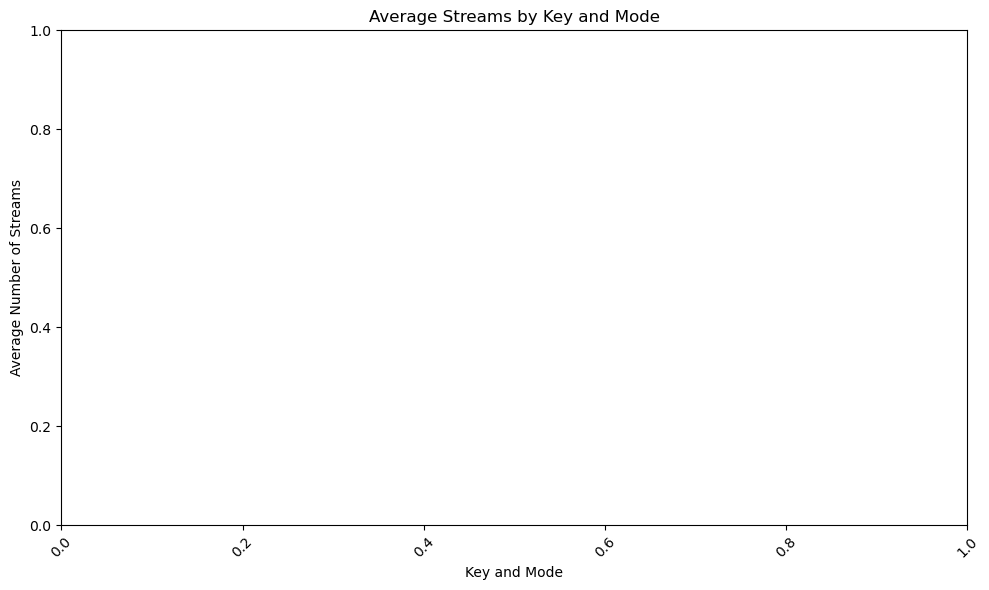

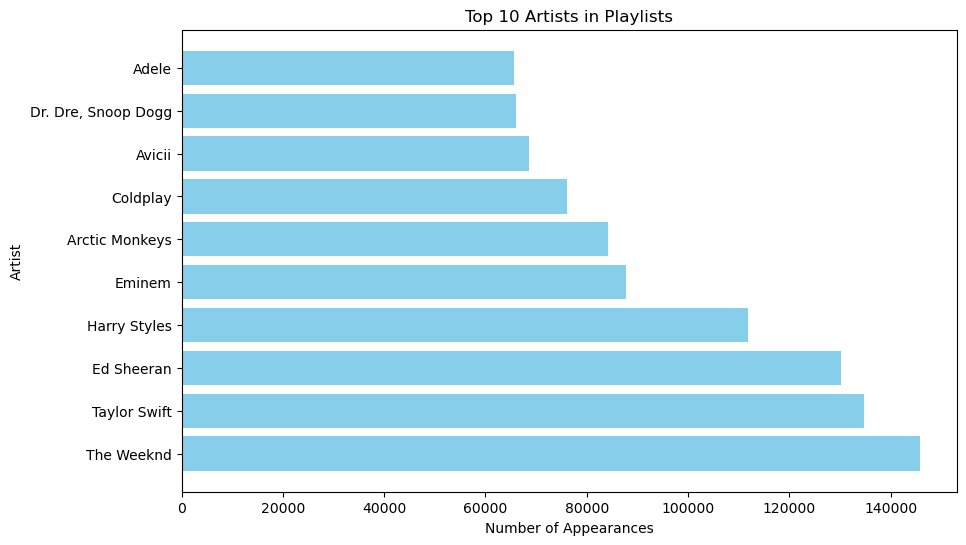

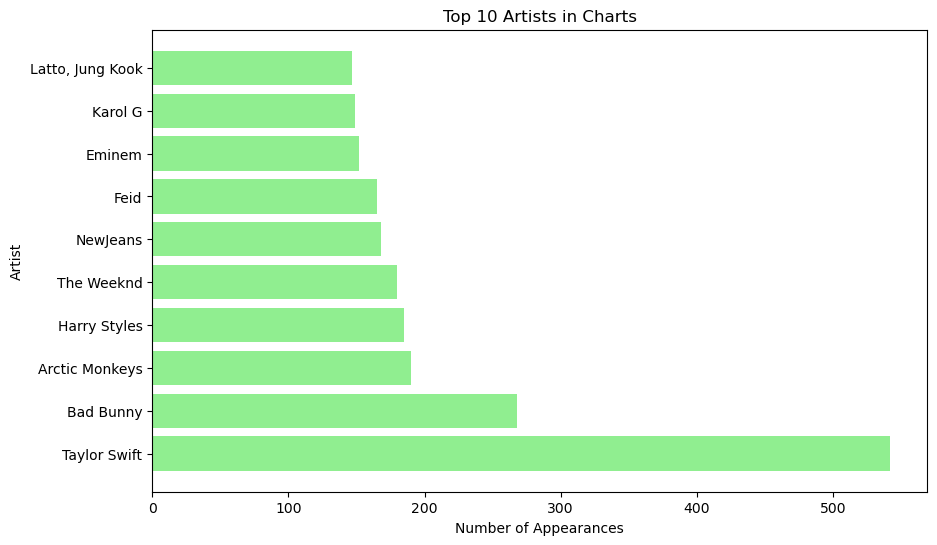

In [33]:
# Load the dataset
data = pd.read_csv('spotify-2023.csv', encoding='latin1')  # Read the CSV file with specified encoding

# Analyze patterns based on key and mode
# Prepare lists to store keys, modes, and average streams
keys = []  # List to store musical keys
modes = []  # List to store modes (Major/Minor)
average_streams = []  # List to store average streams for each key-mode combination

# Calculate the average streams for each key and mode
for key in data['key'].unique():  # Loop through each unique musical key
    for mode in [0, 1]:  # 0 for Minor, 1 for Major
        subset = data[(data['key'] == key) & (data['mode'] == mode)]  # Filter data for the current key and mode
        if not subset.empty:  # Check if the subset is not empty
            average = subset['streams'].mean()  # Calculate the average streams
            keys.append(key)  # Append the key to the list
            modes.append('Major' if mode == 1 else 'Minor')  # Append the corresponding mode
            average_streams.append(average)  # Append the average streams to the list

# Plotting average streams by key and mode using bar charts
plt.figure(figsize=(10, 6))  # Set figure size
for i in range(len(keys)):  # Loop through keys and modes
    plt.bar(f"{keys[i]} ({modes[i]})", average_streams[i])  # Create a bar for each key-mode combination

plt.title('Average Streams by Key and Mode')  # Title of the plot
plt.xlabel('Key and Mode')  # X-axis label
plt.ylabel('Average Number of Streams')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

# Count artist appearances in playlists and charts
artists = data['artist(s)_name'].unique()  # Get unique artists from the dataset
artist_playlists_count = []  # List to store counts of appearances in playlists
artist_charts_count = []  # List to store counts of appearances in charts

# Count appearances for each artist
for artist in artists:  # Loop through each unique artist
    playlists_count = data[data['artist(s)_name'] == artist]['in_spotify_playlists'].sum() + \
                      data[data['artist(s)_name'] == artist]['in_apple_playlists'].sum()  # Total playlist appearances
    charts_count = data[data['artist(s)_name'] == artist]['in_spotify_charts'].sum()  # Total chart appearances
    
    artist_playlists_count.append(playlists_count)  # Append playlists count to the list
    artist_charts_count.append(charts_count)  # Append charts count to the list

# Create a DataFrame for artist counts
artist_counts = pd.DataFrame({
    'Artist': artists,  # Column for artist names
    'In Playlists': artist_playlists_count,  # Column for playlist counts
    'In Charts': artist_charts_count  # Column for chart counts
})

# Sort and get the top 10 artists in playlists
top_artists_playlists = artist_counts.sort_values(by='In Playlists', ascending=False).head(10)  # Top 10 artists in playlists

# Sort and get the top 10 artists in charts
top_artists_charts = artist_counts.sort_values(by='In Charts', ascending=False).head(10)  # Top 10 artists in charts

# Plot top artists in playlists
plt.figure(figsize=(10, 6))  # Set figure size
plt.barh(top_artists_playlists['Artist'], top_artists_playlists['In Playlists'], color='skyblue')  # Horizontal bar chart
plt.title('Top 10 Artists in Playlists')  # Title of the plot
plt.xlabel('Number of Appearances')  # X-axis label
plt.ylabel('Artist')  # Y-axis label
plt.show()  # Display the plot

# Plot top artists in charts
plt.figure(figsize=(10, 6))  # Set figure size
plt.barh(top_artists_charts['Artist'], top_artists_charts['In Charts'], color='lightgreen')  # Horizontal bar chart
plt.title('Top 10 Artists in Charts')  # Title of the plot
plt.xlabel('Number of Appearances')  # X-axis label
plt.ylabel('Artist')  # Y-axis label
plt.show()  # Display the plot
